In [1]:
import random
import numpy as np

demo_types = ['continuous', 'categorical', 'categorical', 'categorical']
demo_nc = [[], [], [], []]
demo_sz = [[], [], [], []]
N = 1000

for i in range(N):
    age = random.randint(15,65)
    sex = random.randint(0,1)
    race = random.randint(0,1)
    diag = [3, 0] #random.randint(0,1)*3 # 0 SZP or 3 NC/Relative
    for d,demo in zip(diag, [demo_nc, demo_sz]):
        demo[0].append(age)
        demo[1].append(sex)
        demo[2].append(race)
        demo[3].append(d)

fc = {'Baltimore': [], 'Chicago': [], 'Dallas': [], 'Detroit': [], 'Hartford': []}

for demo in [demo_nc, demo_sz]:
    for i in range(len(demo)):
        demo[i] = np.array(demo[i])

print('Done')

Done


In [2]:
from demovae import DemoVAE

for loc in fc.keys():
    path = f'/home/anton/Documents/Tulane/Research/FederatedVAE/BSNIP_Models/{loc}.pkl'
    
    vae = DemoVAE(pperiod=100, use_cuda=True, nepochs=5000, latent_dim=30, weight_decay=0, lr=5e-5, loss_rec_mult=500, loss_pred_mult=.01)
    vae.load(path)
    fc[loc] = {}
    for demo, key in zip([demo_nc, demo_sz], ['nc', 'sz']):
        fc[loc][key] = vae.transform(N, demo, demo_types)
        print(fc[loc][key].shape)

/home/anton/.local/lib/python3.13/site-packages/demovae/sklearn.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dct = torch.load(path)


(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)
(1000, 34716)


In [3]:
def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

means = {}

for key in fc.keys():
    means[key] = {}
    for typ in fc[key]:
        means[key][typ] = np.mean(fc[key][typ], axis=0)

print('Done')

Done


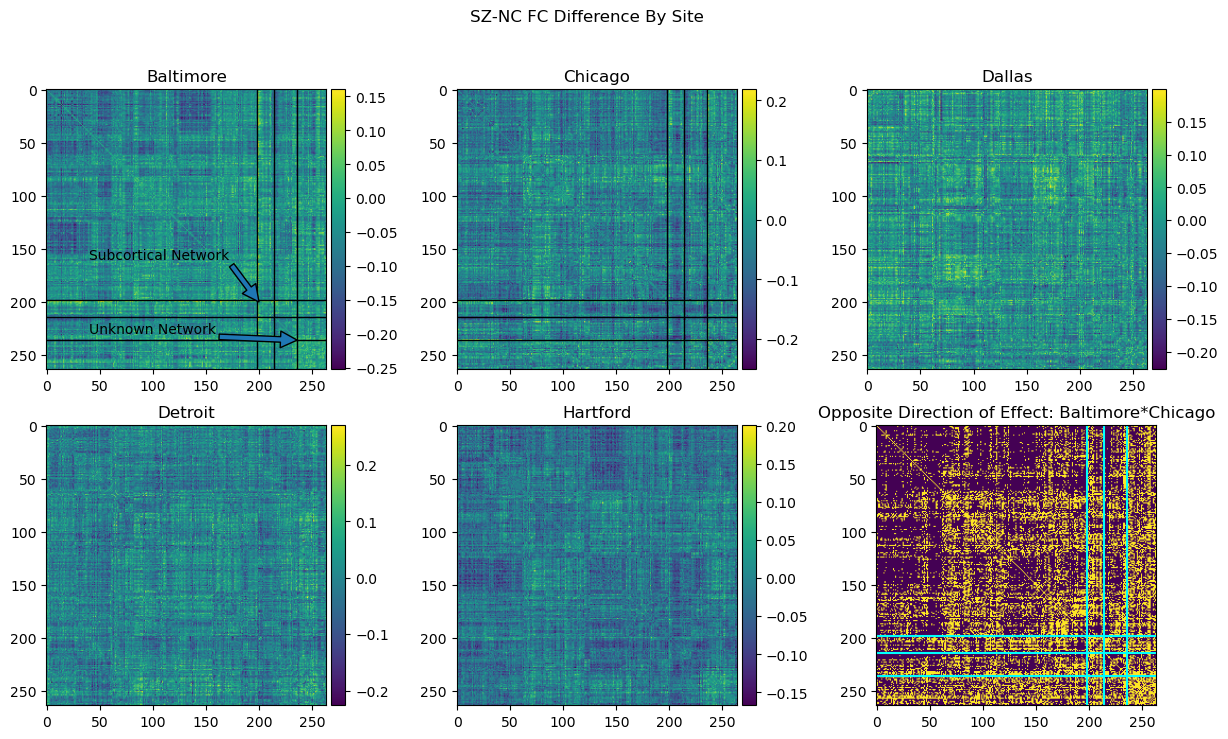

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2,3,figsize=(15,8))

im00 = ax[0,0].imshow(vec2mat(means['Baltimore']['sz']-means['Baltimore']['nc']))
ax[0,0].plot([0,263],[198,198],color='black',linewidth=1)
ax[0,0].plot([0,263],[214,214],color='black',linewidth=1)
ax[0,0].plot([198,198],[0,263],color='black',linewidth=1)
ax[0,0].plot([214,214],[0,263],color='black',linewidth=1)
ax[0,0].plot([0,263],[236,236],color='black',linewidth=1)
ax[0,0].plot([236,236],[0,263],color='black',linewidth=1)
ax[0,0].annotate('Subcortical Network', (200,200), (40,160), arrowprops={})
ax[0,0].annotate('Unknown Network', (236,236), (40,230), arrowprops={})
ax[0,0].set_title('Baltimore')

divider = make_axes_locatable(ax[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im00, cax=cax, orientation='vertical')

im01 = ax[0,1].imshow(vec2mat(means['Chicago']['sz']-means['Chicago']['nc']))
ax[0,1].plot([0,263],[198,198],color='black',linewidth=1)
ax[0,1].plot([0,263],[214,214],color='black',linewidth=1)
ax[0,1].plot([198,198],[0,263],color='black',linewidth=1)
ax[0,1].plot([214,214],[0,263],color='black',linewidth=1)
ax[0,1].plot([0,263],[236,236],color='black',linewidth=1)
ax[0,1].plot([236,236],[0,263],color='black',linewidth=1)
ax[0,1].set_title('Chicago')

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im01, cax=cax, orientation='vertical')

im02 = ax[0,2].imshow(vec2mat(means['Dallas']['sz']-means['Dallas']['nc']))
ax[0,2].set_title('Dallas')

divider = make_axes_locatable(ax[0,2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im02, cax=cax, orientation='vertical')

im10 = ax[1,0].imshow(vec2mat(means['Detroit']['sz']-means['Detroit']['nc']))
ax[1,0].set_title('Detroit')

divider = make_axes_locatable(ax[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im10, cax=cax, orientation='vertical')

im11 = ax[1,1].imshow(vec2mat(means['Hartford']['sz']-means['Hartford']['nc']))
ax[1,1].set_title('Hartford')

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im11, cax=cax, orientation='vertical')

deltaBaltimore = vec2mat(means['Baltimore']['sz']-means['Baltimore']['nc'])+0.02
deltaChicago = vec2mat(means['Chicago']['sz']-means['Chicago']['nc'])-0.02

mult = deltaBaltimore*deltaChicago
mult[mult > 0] = 0
mult[mult < 0] = -1
mult = -mult

im12 = ax[1,2].imshow(mult)
ax[1,2].plot([0,263],[198,198],color='cyan',linewidth=1.5)
ax[1,2].plot([0,263],[214,214],color='cyan',linewidth=1.5)
ax[1,2].plot([198,198],[0,263],color='cyan',linewidth=1.5)
ax[1,2].plot([214,214],[0,263],color='cyan',linewidth=1.5)
ax[1,2].plot([0,263],[236,236],color='cyan',linewidth=1.5)
ax[1,2].plot([236,236],[0,263],color='cyan',linewidth=1.5)
ax[1,2].set_title('Opposite Direction of Effect: Baltimore*Chicago')

fig.suptitle('SZ-NC FC Difference By Site')
fig.savefig('/home/anton/Documents/Tulane/Research/FederatedVAE/Figures/SzNcSiteDiffs.pdf')
fig.show()


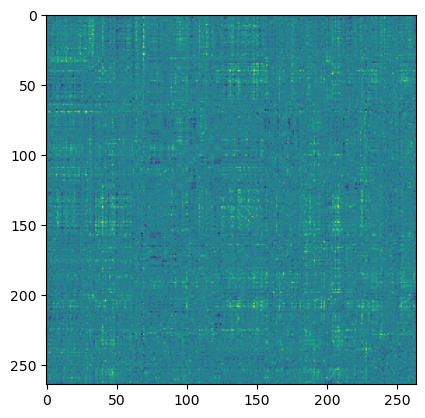

In [36]:
deltaBaltimore = vec2mat(means['Hartford']['sz']-means['Hartford']['nc'])
deltaChicago = vec2mat(means['Dallas']['sz']-means['Dallas']['nc'])
mult = deltaBaltimore*deltaChicago
mult[mult > 0] = 0
mult[mult < 0] = -1

plt.imshow(mult)